<a href="https://www.kaggle.com/code/ahmedhaytham/chest-x-ray-solve-the-problem-of-imbalance?scriptVersionId=130342803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers

import os
import glob
import shutil

# Let Know the data
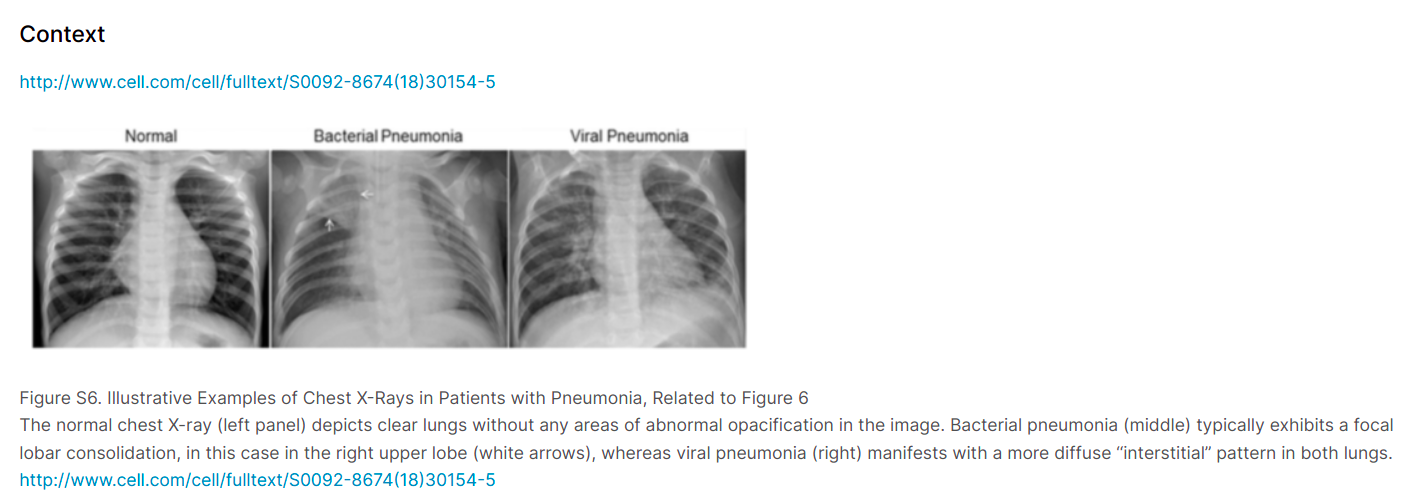
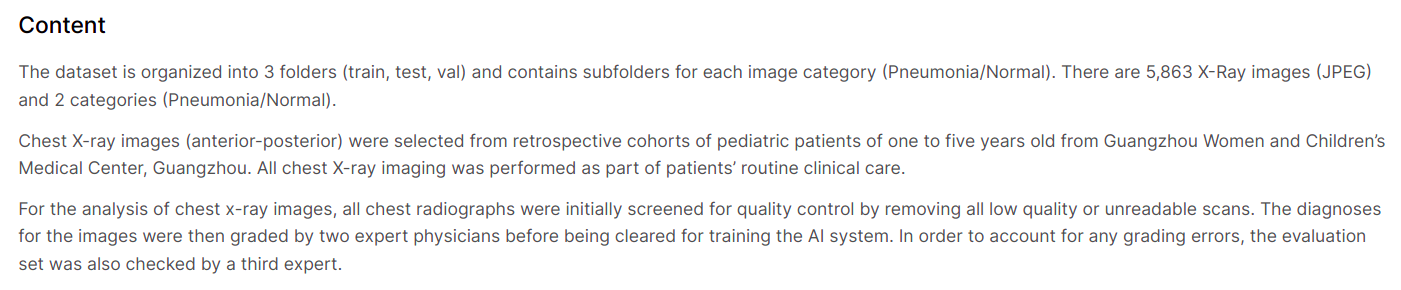

# Data Exploration
The goal here is to have a deeper understanding of the data to try to prepare it before building and training the model


In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 224
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/chest-xray-pneumonia/chest_xray/train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)


In [ ]:
class_names = train_dataset.class_names
class_names

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/chest-xray-pneumonia/chest_xray/test",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)


In [ ]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/chest-xray-pneumonia/chest_xray/val",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

In [ ]:
 plt.figure(figsize = (15,15))
 for image_batch, label_batch in train_dataset.take(1):
   for i in range(12):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]],fontsize = 8)
     plt.axis("off")
  #  print(image_batch.shape[0].shape)

## Is the data balanced ?

In [ ]:
# Let's get images array and classes in np array to make it easy for visualization
def get_img_class(tf_BatchDataset):
    data = tf_BatchDataset.unbatch()
    images = np.array(list(data.map(lambda x, y: x)))
    labels = np.array(list(data.map(lambda x, y: y)))
    print('NO.Images = ',len(images),'NO.Classes = ',len(labels),' Done!')
    return images , labels

In [ ]:
images_train , classes_train = get_img_class(train_dataset)
images_test , classes_test = get_img_class(test_dataset)
images_val , classes_val = get_img_class(val_dataset)


In [ ]:
px.pie(names=classes_train,title='Train').show()

In [ ]:
px.pie(names=classes_test,title='Test').show()

In [ ]:
px.pie(names=classes_val,title='Val').show()

Finally something balance with just 16 image 😂 


# Results
i will make my data with 3 classes

In [ ]:
!mkdir /kaggle/working/Data/

In [ ]:
!mkdir /kaggle/working/Data/
!mkdir /kaggle/working/Data/Normal
!mkdir /kaggle/working/Data/bacteria
!mkdir /kaggle/working/Data/virus

In [ ]:
! cp ../input/chest-xray-pneumonia/chest_xray/train/NORMAL/*.jpeg /kaggle/working/Data/Normal
! cp ../input/chest-xray-pneumonia/chest_xray/test/NORMAL/*.jpeg /kaggle/working/Data/Normal
! cp ../input/chest-xray-pneumonia/chest_xray/val/NORMAL/*.jpeg /kaggle/working/Data/Normal

In [ ]:
! cp ../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*_bacteria_*.jpeg /kaggle/working/Data/bacteria
! cp ../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/*_bacteria_*.jpeg /kaggle/working/Data/bacteria
! cp ../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/*_bacteria_*.jpeg /kaggle/working/Data/bacteria

! cp ../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*_virus_*.jpeg /kaggle/working/Data/virus
! cp ../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/*_virus_*.jpeg /kaggle/working/Data/virus
! cp ../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/*_virus_*.jpeg /kaggle/working/Data/virus

In [ ]:
5216+624+16

In [ ]:
normal_new_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/Data",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

In [ ]:
images_data , classes_data = get_img_class(normal_new_data)


In [ ]:
(unique, counts) = np.unique(classes_data, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

In [ ]:
px.pie(names=classes_data,title='Train').show()

In [ ]:
!mkdir /kaggle/working/Data_blance/


In [ ]:
! mkdir /kaggle/working/Data_blance/Train
! mkdir /kaggle/working/Data_blance/Test
! mkdir /kaggle/working/Data_blance/Val

In [ ]:
! pwd

In [ ]:
def cut_image(from_path,to_path,num):
  count=0
  m=from_path.split('/')
  # print('m = ',m)
  os.mkdir(to_path+m[-1])
  for jpgfile in glob.iglob(os.path.join(from_path, "*.jpeg")):
      if(count<num):
        c=to_path+'/'+m[-1]
        shutil.move(jpgfile, c)
        # print('c is ',c)
        count=count+1
      else:
        break


In [ ]:
! cd /kaggle/working/Data_blance

In [ ]:
from_dir = "/kaggle/working/Data/Normal"
to_dirs = "/kaggle/working/Data_blance/Train/"
img_nums =1300
cut_image(from_dir,to_dirs,img_nums)


from_dir = "/kaggle/working/Data/bacteria"
to_dirs = "/kaggle/working/Data_blance/Train/"
img_nums =1300
cut_image(from_dir,to_dirs,img_nums)



from_dir = "/kaggle/working/Data/virus"
to_dirs = "/kaggle/working/Data_blance/Train/"
img_nums =1300
cut_image(from_dir,to_dirs,img_nums)

In [ ]:
from_dir = "/kaggle/working/Data/Normal"
to_dirs = "/kaggle/working/Data_blance/Test/"
img_nums =100
cut_image(from_dir,to_dirs,img_nums)


from_dir = "/kaggle/working/Data/bacteria"
to_dirs = "/kaggle/working/Data_blance/Test/"
img_nums =100
cut_image(from_dir,to_dirs,img_nums)



from_dir = "/kaggle/working/Data/virus"
to_dirs = "/kaggle/working/Data_blance/Test/"
img_nums =100
cut_image(from_dir,to_dirs,img_nums)

In [ ]:
from_dir = "/kaggle/working/Data/Normal"
to_dirs = "/kaggle/working/Data_blance/Val/"
img_nums =93
cut_image(from_dir,to_dirs,img_nums)


from_dir = "/kaggle/working/Data/bacteria"
to_dirs = "/kaggle/working/Data_blance/Val/"
img_nums =93
cut_image(from_dir,to_dirs,img_nums)



from_dir = "/kaggle/working/Data/virus"
to_dirs = "/kaggle/working/Data_blance/Val/"
img_nums =93
cut_image(from_dir,to_dirs,img_nums)

In [ ]:
! ls Data_blance/Train/Normal/ |  wc -l

In [ ]:
! ls Data_blance/Train/bacteria/ |  wc -l

In [ ]:
! ls Data_blance/Train/virus/ |  wc -l

In [ ]:
! ls Data/Normal/ |  wc -l

In [ ]:
train_dataset_b = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/Data_blance/Train/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

In [ ]:
test_dataset_b = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/Data_blance/Test/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

In [ ]:
val_dataset_b = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/Data_blance/Val/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

In [ ]:
images_train_b , classes_train_b = get_img_class(train_dataset_b)
images_test_b , classes_test_b = get_img_class(test_dataset_b)
images_val_b , classes_val_b = get_img_class(val_dataset_b)


In [ ]:
px.pie(names=classes_train_b,title='Train _ blance').show()

In [ ]:
px.pie(names=classes_test_b,title='Train _ blance').show()

In [ ]:
px.pie(names=classes_val_b,title='Train _ blance').show()

In [ ]:
! rm -R /kaggle/working/Data

# Final 
1. made my dataset with new class link of data [here](https://www.kaggle.com/ahmedhaytham/chest-xray-images-pneumonia-with-new-class)
2. Split data with more images in testing and validation
3. bulid model in this [Note Book](https://www.kaggle.com/ahmedhaytham/chest-x-ray-images-pneumonia-with-new-class)